#### Write a Program that uses an if-else ladder:

In [1]:
shopping_budget = [3400,12000,4500,24499,10000,5000]
my_budget = 5000
for budget in shopping_budget:
    if budget<my_budget:
        print("I'll be selecting one of these dresses: ", budget)
    elif budget == my_budget:
        print("This is my threshold: ", budget)
    else:
        print("No thanks, I'm broke!: ", budget)

I'll be selecting one of these dresses:  3400
No thanks, I'm broke!:  12000
I'll be selecting one of these dresses:  4500
No thanks, I'm broke!:  24499
No thanks, I'm broke!:  10000
This is my threshold:  5000


#### Write five different functions and call them in one program

In [2]:
from math import sqrt
def summ(a,b):
    return a+b
def diff(a,b):
    return a-b
def mult(a,b):
    return a*b
def div(a,b):
    return a/b
def sqr(a):
    return sqrt(a)
print("The sum of two numbers is: ",summ(4,7))
print("The difference between two numbers is: ",diff(13,8))
print("The product of two numbers is: ",mult(98,8))
print("Quoitent of two numbers: ",div(25,5))
print("The square root is: ", sqr(81))

The sum of two numbers is:  11
The difference between two numbers is:  5
The product of two numbers is:  784
Quoitent of two numbers:  5.0
The square root is:  9.0


#### Read any dataset from https://archive.ics.uci.edu/ml/index.php and perform a missing value treatment, check for distribution of each variable, find the correlation matrix and write conclusions from the matrix.

In [4]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('Tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [10]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:
#There are no missing values in this dataset

In [12]:
#To find out the distribution of each variable

array([[<AxesSubplot:title={'center':'total_bill'}>]], dtype=object)

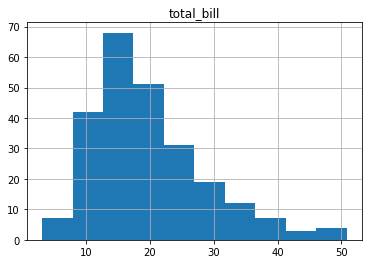

In [15]:
df.hist(column = 'total_bill')

array([[<AxesSubplot:title={'center':'tip'}>]], dtype=object)

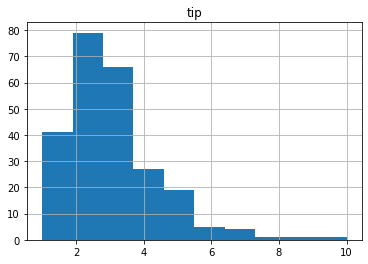

In [16]:
df.hist(column = 'tip')

array([[<AxesSubplot:title={'center':'size'}>]], dtype=object)

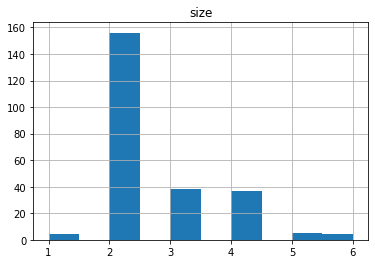

In [18]:
df.hist(column = 'size')

In [19]:
#These variables follow normal distribution

To test for normality: Shapiro-Wilk test

H0: Distribution of the sample is not significantly different from the normal distribution

H1: Distribution of the sample is significantly different from the normal distribution

In [20]:
from scipy.stats import shapiro
x = shapiro(df['total_bill'])
x

ShapiroResult(statistic=0.9197188019752502, pvalue=3.3245434183371003e-10)

In [21]:
y = shapiro(df['tip'])
y

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

In [22]:
z = shapiro(df['tip'])
z

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

Since, the p-value for all the three variables is greater than 0.5, we accept the null hypothesis.
The null hypothesis for this test is that the data are normally distributed.

In [23]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


We can see here that there is correlation between total_bill, tip and size values.

#### 1.Read the dataset and perform slicing in different ways

In [24]:
df.loc[:, ['tip','size']]

,tip,size
0,1.01,2
1,1.66,3
2,3.50,3
3,3.31,2
4,3.61,4
...,...,...
239,5.92,3
240,2.00,2
241,2.00,2
242,1.75,2


In [25]:
df.iloc[2:3]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.5,Male,No,Sun,Dinner,3


In [26]:
df.sort_index().loc[1:2]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [27]:
df.iloc[[1,2,4],[2,4]]

,sex,day
1,Male,Sun
2,Male,Sun
4,Female,Sun


In [28]:
df.loc[lambda df: [0,1]]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [29]:
df[lambda df: df.columns[0]]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

Q. Can we find correlation between two categorical variables? How?

No, we cannot find the correlation between two categorical variables, 
because, intuitively, in the correlation formual, you take the sum of responses, 
and a sum doesn't make sense in the cases of categorical values. 
For example: Let's say we have the data where one column represents two genders, taking the sum of that does not make sense. 
Therefore, we cannot find the correlation between two categorical variables